# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


# Loading Datasets

In [2]:

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Label Encoding


In [6]:
sex_label = LabelEncoder()
embarked_label = LabelEncoder()

titanic['Sex'] = sex_label.fit_transform(titanic['Sex'])
sex_map = dict(enumerate(sex_label.classes_))

titanic['Embarked'] = embarked_label.fit_transform(titanic['Embarked'])
embarked_map = dict(enumerate(embarked_label.classes_))

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [7]:
print(f'Sex Mapping -- > {sex_map}')
print(f'Embarked_mapping -- > {embarked_map}')

Sex Mapping -- > {0: 'female', 1: 'male'}
Embarked_mapping -- > {0: 'C', 1: 'Q', 2: 'S'}


In [8]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [9]:
scaled = StandardScaler()

X_scaled = scaled.fit_transform(X)
print(X_scaled)

[[ 0.82737724  0.73769513 -0.56573646 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.1046374  ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25833709 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.20276197 ... -0.47367361 -0.49237783
  -0.67817453]]


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


# Witout Resampling

In [11]:
list_1 = np.logspace(-10,3,14)
print(list_1)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03]


In [13]:

for i in list_1: 
    naive = GaussianNB(var_smoothing=i)
    
    naive.fit(X_train,Y_train)
    
    X_train_pred = naive.predict(X_train)
    train_accuracy = accuracy_score(Y_train,X_train_pred)
    
    X_test_pred = naive.predict(X_test)
    test_accuracy = accuracy_score(Y_test,X_test_pred)


    print(f"Var smoothing {i} --> Train : {train_accuracy}")
    print(f"Var smoothing {i} --> Test : {test_accuracy}")
    print("-" * 20)




Var smoothing 1e-10 --> Train : 0.7879213483146067
Var smoothing 1e-10 --> Test : 0.7877094972067039
--------------------
Var smoothing 1e-09 --> Train : 0.7879213483146067
Var smoothing 1e-09 --> Test : 0.7877094972067039
--------------------
Var smoothing 1e-08 --> Train : 0.7879213483146067
Var smoothing 1e-08 --> Test : 0.7877094972067039
--------------------
Var smoothing 1e-07 --> Train : 0.7879213483146067
Var smoothing 1e-07 --> Test : 0.7877094972067039
--------------------
Var smoothing 1e-06 --> Train : 0.7879213483146067
Var smoothing 1e-06 --> Test : 0.7877094972067039
--------------------
Var smoothing 1e-05 --> Train : 0.7879213483146067
Var smoothing 1e-05 --> Test : 0.7877094972067039
--------------------
Var smoothing 0.0001 --> Train : 0.7879213483146067
Var smoothing 0.0001 --> Test : 0.7877094972067039
--------------------
Var smoothing 0.001 --> Train : 0.7879213483146067
Var smoothing 0.001 --> Test : 0.7877094972067039
--------------------
Var smoothing 0.01 -->

In [14]:
naive = GaussianNB(var_smoothing=0.01)

naive.fit(X_train,Y_train)

X_train_pred = naive.predict(X_train)
train_accuracy = accuracy_score(Y_train,X_train_pred)

X_test_pred = naive.predict(X_test)
test_accuracy = accuracy_score(Y_test,X_test_pred)


print(f"Var smoothing  {0.01}--> Train : {train_accuracy}")
print(f"Var smoothing {0.01} --> Test : {test_accuracy}")

Var smoothing  0.01--> Train : 0.7879213483146067
Var smoothing 0.01 --> Test : 0.7877094972067039


In [16]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred,target_names=['Dead','Alive']))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred,target_names=['Dead','Alive']))


Classification Report - Training Set:
              precision    recall  f1-score   support

        Dead       0.83      0.82      0.83       439
       Alive       0.72      0.74      0.73       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

Classification Report - Testing Set:
              precision    recall  f1-score   support

        Dead       0.83      0.83      0.83       110
       Alive       0.72      0.72      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



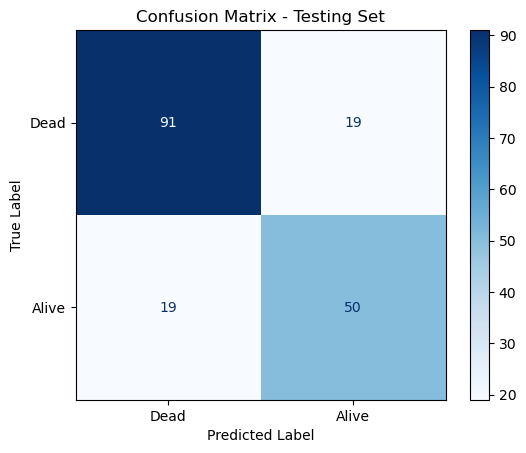

In [17]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [18]:
param = {
    "var_smoothing" : np.logspace(-10,3,14)
}

In [20]:
grid_search = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param,
    cv = 5,
    scoring = "accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy', verbose=2)

In [21]:
print(f"Best parameters for Naive Bayes : {grid_search.best_params_}")
print(f"Best cross validation accuracy : {grid_search.best_score_}")

Best parameters for Naive Bayes : {'var_smoothing': 1e-10}
Best cross validation accuracy : 0.7850980005909582


In [22]:
best_naive = grid_search.best_estimator_

X_train_pred_best = best_naive.predict(X_train)
X_test_pred_best = best_naive.predict(X_test)

train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")

test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Train Accuracy with Best Parameters: 0.7879
Test Accuracy with Best Parameters: 0.7877


In [23]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Dead','Alive']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Dead','Alive']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.83      0.82      0.83       439
       Alive       0.72      0.74      0.73       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.83      0.83      0.83       110
       Alive       0.72      0.72      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



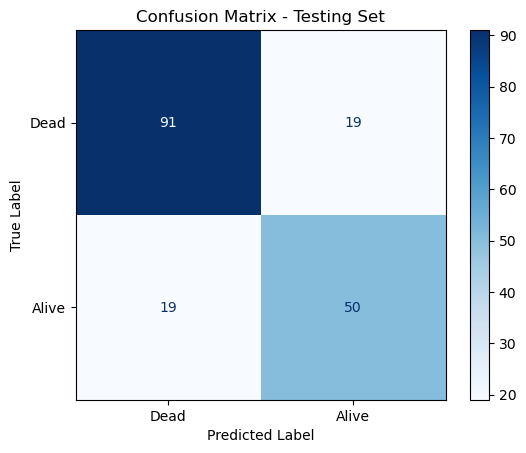

In [24]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
